<a href="https://colab.research.google.com/github/AditiPanda/high_dimensional_data_vis/blob/main/Copy_of_FD__Problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement:
Given a new datapoint we have to predict the Activity. 

# Dataset Description


This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.

## How data was recorded

By using the sensors(Gyroscope and accelerometer) in a smartphone, they have captured '3-axial linear acceleration'(tAcc-XYZ) from accelerometer and '3-axial angular velocity' (tGyro-XYZ) from Gyroscope with several variations.

prefix 't' in those metrics denotes time.

suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.

## Feature Names
1. These sensor signals are preprocessed by applying noise filters and then sampled in fixed-width windows(sliding windows) of 2.56 seconds each with 50% overlap. ie., each window has 128 readings.

2. From Each window, a feature vector was obtianed by calculating variables from the time and frequency domain. In the dataset, each datapoint represents a window with different readings

3. The accelertion signal was saperated into Body and Gravity acceleration signals(tBodyAcc-XYZ and tGravityAcc-XYZ) using some low pass filter with corner frequecy of 0.3Hz.

4. After that, the body linear acceleration and angular velocity were derived in time to obtian jerk signals (tBodyAccJerk-XYZ and tBodyGyroJerk-XYZ).

5. The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like tBodyAccMag, tGravityAccMag, tBodyAccJerkMag, tBodyGyroMag and tBodyGyroJerkMag.

6. Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with prefix 'f' just like original signals with prefix 't'. These signals are labeled as fBodyAcc-XYZ, fBodyGyroMag etc.,.

7. These are the signals that we got so far.

  - tBodyAcc-XYZ
  - tGravityAcc-XYZ
  - tBodyAccJerk-XYZ
  - tBodyGyro-XYZ
  - tBodyGyroJerk-XYZ
  - tBodyAccMag
  - tGravityAccMag
  - tBodyAccJerkMag
  - tBodyGyroMag
  - tBodyGyroJerkMag
  - fBodyAcc-XYZ
  - fBodyAccJerk-XYZ
  - fBodyGyro-XYZ
  - fBodyAccMag
  - fBodyAccJerkMag
  - fBodyGyroMag
  - fBodyGyroJerkMag
8. We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.

  - mean(): Mean value
  - std(): Standard deviation
  - mad(): Median absolute deviation
  - max(): Largest value in array
  - min(): Smallest value in array
  - sma(): Signal magnitude area
  - energy(): Energy measure. Sum of the squares divided by the number of values.
  - iqr(): Interquartile range
  - entropy(): Signal entropy
  - arCoeff(): Autorregresion coefficients with Burg order equal to 4
  - correlation(): correlation coefficient between two signals
  - maxInds(): index of the frequency component with largest magnitude
  - meanFreq(): Weighted average of the frequency components to obtain a mean frequency
  - skewness(): skewness of the frequency domain signal
  - kurtosis(): kurtosis of the frequency domain signal
  - bandsEnergy(): Energy of a frequency interval within the 64 bins of the FFT of each window.
  - angle(): Angle between to vectors.

9. We can obtain some other vectors by taking the average of signals in a single window sample. These are used on the angle() variable' `

  - gravityMean
  - tBodyAccMean
  - tBodyAccJerkMean
  - tBodyGyroMean
  - tBodyGyroJerkMean



## Y_Labels(Encoded)
In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.

  - WALKING as 1
  - WALKING_UPSTAIRS as 2
  - WALKING_DOWNSTAIRS as 3
  - SITTING as 4
  - STANDING as 5
  - LAYING as 6

## Train and test data were saperated
- The readings from 70% of the volunteers were taken as trianing data and remaining 30% subjects recordings were taken for test data

## Data
- All the data is present in 'UCI_HAR_dataset/' folder in present working directory.
  - Feature names are present in 'UCI_HAR_dataset/features.txt'
  - **Train Data**
  - 'UCI_HAR_dataset/train/X_train.txt'
  - 'UCI_HAR_dataset/train/subject_train.txt'
  - 'UCI_HAR_dataset/train/y_train.txt'

  - **Test Data**
  -'UCI_HAR_dataset/test/X_test.txt'
  -'UCI_HAR_dataset/test/subject_test.txt'
  -'UCI_HAR_dataset/test/y_test.txt'

# Quick overview of the dataset

Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities.

- Walking
- WalkingUpstairs
- WalkingDownstairs
- Standing
- Sitting
- Lying.

Readings are divided into a window of 2.56 seconds with 50% overlapping.

Accelerometer readings are divided into gravity acceleration and body acceleration readings, which has x,y and z components each.

Gyroscope readings are the measure of angular velocities which has x,y and z components.

Jerk signals are calculated for BodyAcceleration readings.

Fourier Transforms are made on the above time readings to obtain frequency readings.

Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.

We get a feature vector of 561 features and these features are given in the dataset.

Each window of readings is a datapoint of 561 features.

## Problem Framework
- 30 subjects(volunteers) data is randomly split to 70%(21) test and 30%(7) train data.
- Each datapoint corresponds one of the 6 Activities.

# Obtain the train and test data

In [ ]:
# mount drive to load dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read train data into a dataframe
import pandas as pd
train_df = pd.read_csv('/content/drive/MyDrive/FD_Datasets-20220317T081817Z-001/FD_Datasets/f_train.csv')
train_df.shape

(7352, 563)

In [ ]:
# read train data into a dataframe
test_df = pd.read_csv('/content/drive/MyDrive/FD_Datasets-20220317T081817Z-001/FD_Datasets/f_test.csv')
test_df.shape

(2947, 563)

# Data Cleaning

In [ ]:
# first five rows of train data
train_df.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [ ]:
# fetch the activity column - to be predicted
y_activity = train_df['Activity']
y_activity.shape

(7352,)

In [ ]:
# get rid of result column and subject column from train_df 
# now train_df holds only data points
train_df.drop(['subject' , 'Activity'], axis = 1, inplace=True)
print(f'Now train_df size: {train_df.shape}')

Now train_df size: (7352, 561)


# **Convert Categorical Activity column into Numerical data**

In [ ]:
data_classes = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
d = dict(zip(data_classes, range(0,6)))
print(len(d))
print(d)
y_num = y_activity.map(d, na_action='ignore')

6
{'WALKING': 0, 'WALKING_UPSTAIRS': 1, 'WALKING_DOWNSTAIRS': 2, 'SITTING': 3, 'STANDING': 4, 'LAYING': 5}


In [ ]:
import numpy as np
result = y_num.items()  
# Convert object to a list
data = list(result)  
# Convert list to an array
numpyArray = np.array(data)
y = numpyArray[:,1]
y

array([4, 4, 4, ..., 1, 1, 1])

## 1. Check for Duplicates

In [ ]:
n_duplicates = train_df.duplicated().sum()
print(f"You seem to have {n_duplicates} duplicates in your database.")

You seem to have 0 duplicates in your database.


## 2. Check for NaN/null values

In [ ]:
print('Size before dropping NaN values: {}'.format(train_df.shape))
train_df = train_df.dropna()
print('Size after dropping NaN values: {}'.format(train_df.shape))

Size before dropping NaN values: (7352, 561)
Size after dropping NaN values: (7352, 561)


## 3. Check for data imbalance

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


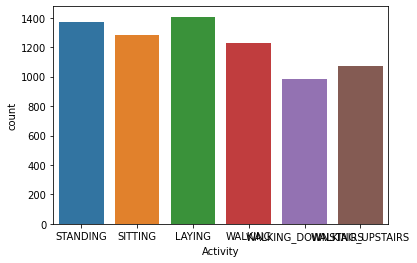

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.countplot(y_activity)
plt.show()

## 4. Changing feature names

## 5. Save this dataframe in a csv files

# Exploratory Data Analysis

In [ ]:
train_df.describe()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


Too many features here: 561
Let's look at the number of unique values per feature.


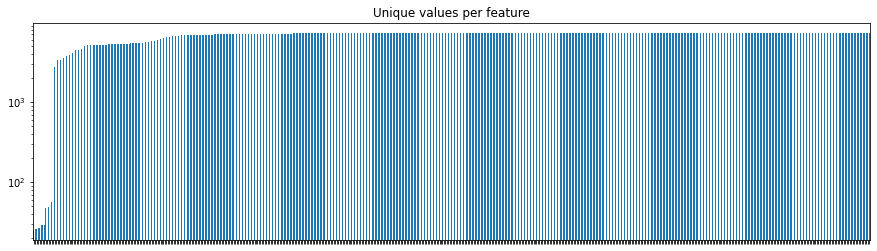

In [ ]:
print('Too many features here: {}'.format(train_df.dtypes.count()))
unique_values = train_df.select_dtypes(include="number").nunique().sort_values()
print('Let\'s look at the number of unique values per feature.')
unique_values.plot.bar(logy=True, figsize=(15,4), title="Unique values per feature")
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([]);
#ax.axes.xaxis.set_visible(False);
#plt.axis('off');

# Apply t-sne on the data

In [ ]:
import time
import matplotlib.patheffects as PathEffects

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

In [ ]:
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [ ]:
from sklearn.decomposition import PCA

time_start = time.time()

pca = PCA(n_components=4)
pca_result = pca.fit_transform(train_df)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 0.3975710868835449 seconds


In [ ]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [0.6255444  0.04913023 0.04121467 0.01874956]


In [ ]:
print(train_df.shape)
print(y_activity.shape)

(7352, 561)
(7352,)


In [ ]:
print(pca_df.shape)
print(y.shape)

(7352, 4)
(7352,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


(<Figure size 576x576 with 1 Axes>,
 [Text(5.544130756241013, 0.3157187954194347, '0'),
  Text(5.048257107289464, -1.6534654723564708, '1'),
  Text(7.749785797781683, 0.8232335656132025, '2'),
  Text(-5.450415712091123, 0.32861522275787025, '3'),
  Text(-5.170077748580911, -0.23113062615148156, '4'),
  Text(-5.775559173761604, 0.6294922367143472, '5')])

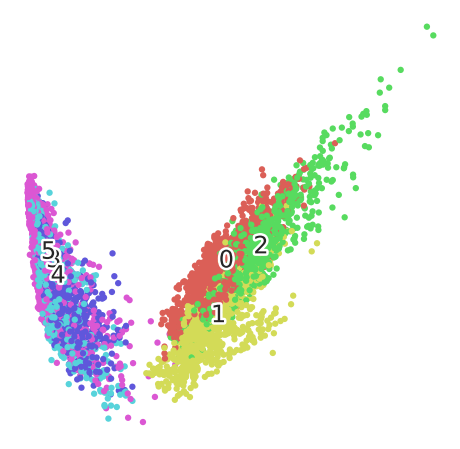

In [ ]:
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

fashion_scatter(top_two_comp.values, y) # Visualizing the PCA output

In [ ]:
from sklearn.manifold import TSNE

time_start = time.time()

fashion_tsne = TSNE(random_state=RS).fit_transform(train_df)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


t-SNE done! Time elapsed: 42.01738238334656 seconds


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


(<Figure size 576x576 with 1 Axes>,
 [Text(-9.087687, -46.846565, '0'),
  Text(-34.976135, 8.86558, '1'),
  Text(-55.98769, -26.527689, '2'),
  Text(43.42809, 12.255817, '3'),
  Text(47.997887, -14.63398, '4'),
  Text(0.24662067, 61.14888, '5')])

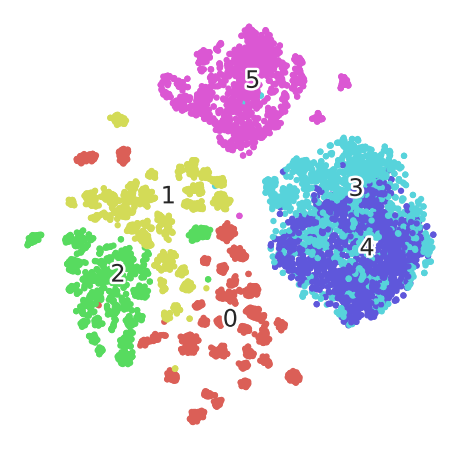

In [ ]:
fashion_scatter(fashion_tsne, y)

In [ ]:
time_start = time.time()

pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(train_df)

print('PCA with 50 components done! Time elapsed: {} seconds'.format(time.time()-time_start))

print('Cumulative variance explained by 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

PCA with 50 components done! Time elapsed: 0.6423139572143555 seconds
Cumulative variance explained by 50 principal components: 0.9308504159278408


In [ ]:
time_start = time.time()


fashion_pca_tsne = TSNE(random_state=RS).fit_transform(pca_result_50)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


t-SNE done! Time elapsed: 39.90103530883789 seconds


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


(<Figure size 576x576 with 1 Axes>,
 [Text(-19.857754, -53.44935, '0'),
  Text(-19.899702, -17.987116, '1'),
  Text(-54.37588, -6.7135906, '2'),
  Text(34.531925, 9.5649605, '3'),
  Text(54.979393, -5.9027348, '4'),
  Text(-5.098242, 62.329296, '5')])

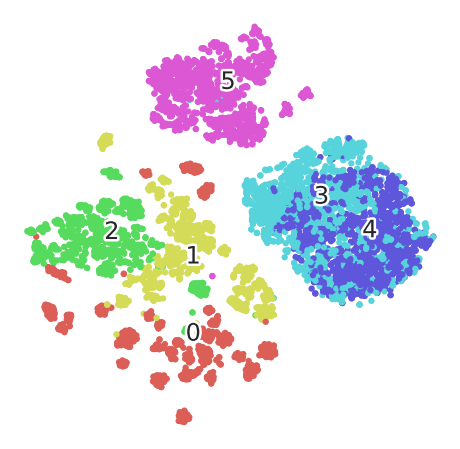

In [ ]:
fashion_scatter(fashion_pca_tsne, y)

In [ ]:
from google.colab import drive
drive.flush_and_unmount()

Drive not mounted, so nothing to flush and unmount.
